In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# !pip install pytables

In [3]:
# %cd /content/drive/MyDrive/Thesis/Organized/Data/Human_DLPFC/Ipynbs/

In [2]:
# import scanpy as sc
# import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance
import math
from sklearn.metrics.pairwise import euclidean_distances
import pickle

In [3]:
# sc.set_figure_params(facecolor="white", figsize=(4, 4))
# sc.settings.verbosity = 3

In [9]:
#This cell generates manual scribble of DLPFC images at desired location 



color_map = {
  0: np.array([123, 123, 123])/255,
  7: np.array([126, 178, 255])/255,
  1: np.array([0, 255, 0])/255,
  2: np.array([255, 123, 0])/255,
  3: np.array([255, 0, 255])/255,
  4: np.array([255, 255, 0])/255,
  5: np.array([0, 0, 255])/255,
  6: np.array([255, 0, 0])/255,
  10: np.array([200, 200, 200])/255,
}

dlpfc_samples = ['151669', '151670', '151671', '151672', '151673', '151674', '151675', '151676', '151507', '151508', '151509', '151510']
# dlpfc_samples = ['151670']

for dlpfc_sample in dlpfc_samples:
  scribble_csv_file_name = 'manual_scribble_' + dlpfc_sample + '_test_1'
  manual_scribble_csv_path = '../' + dlpfc_sample + '/' + scribble_csv_file_name + '.csv'
  coordinates_csv_path = '../' + dlpfc_sample + '/Coordinates/coordinates.csv'
  df_man = pd.read_csv(manual_scribble_csv_path)
  df_coord = pd.read_csv(coordinates_csv_path)
  df_man['cluster.init'].value_counts()
  df_man['cluster.init'] = df_man['cluster.init'].fillna(10)
  df = df_coord.copy()
  df['cluster.init'] = df_man['cluster.init'].astype("int")
  colors = []
  for label in df['cluster.init']:
    colors.append(color_map[label])
  plt.figure(figsize=(10, 10))
  # colors_many = ['black', 'grey', 'blue', 'green', 'red', 'yellow', 'purple', 'pink', 'cyan', 'orange', 'magenta']
  # colors = [colors_many[int(j)] for j in df['cluster.init']]
  plt.scatter(df['imagecol'], 700 - df['imagerow'], c=colors)
  plt.savefig('../' + dlpfc_sample + '/Image_For_Scribbling/' + scribble_csv_file_name + '.png')
  plt.clf()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [2]:
scr_npy = np.load('C:/Home/Thesis/Git_Repo/Thesis/Algorithms/Unsupervised_Segmentation/Approaches/With_Scribble/Local_Data/Scribble/manually_annotated_scribble.npy')
np.unique(scr_npy)

array([  1,   2,   3,   4,   5,   6,   7, 255], dtype=uint8)

3609


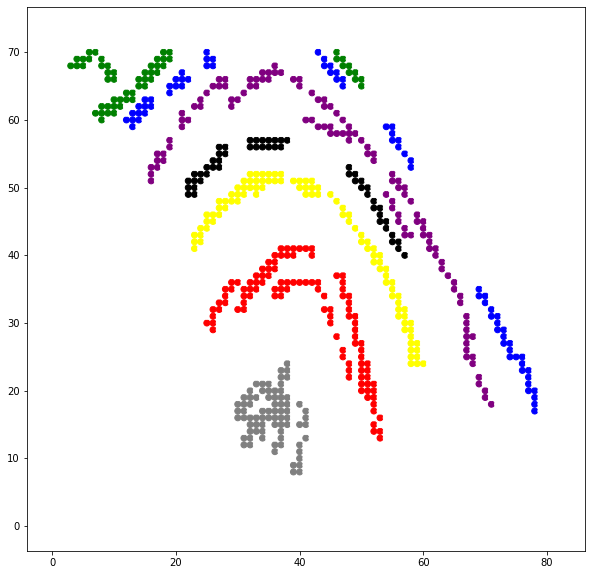

In [18]:
# This code makes the scribble npy from scribble csv and saves it to the desired location

dlpfc_sample = '151673'
scribble_csv_file_name = 'manual_scribble_test_7'

with open('C:/Home/Thesis/Git_Repo/Thesis/Algorithms/Unsupervised_Segmentation/Approaches/With_Scribble/Local_Data/Human_DLPFC/151673/Pickles/pixel_barcode_map.pickle', 'rb') as handle:
    pixel_barcode_map = pickle.load(handle)
    print(len(pixel_barcode_map))
    barcode_pixel_map = dict([(value, key) for key, value in pixel_barcode_map.items()])

barcode_scribble_label = pd.read_csv('../' + dlpfc_sample + '/' + scribble_csv_file_name + '.csv')
barcode_scribble_label['cluster.init'].fillna(255, inplace=True)
barcode_scribble_label['cluster.init'] = barcode_scribble_label['cluster.init'].astype('int')

barcode_scribble_label.rename(columns={'Unnamed: 0.1': 'barcode'}, inplace=True)

mx_x = max([x for (x, y) in barcode_pixel_map.values()])
mn_x = min([x for (x, y) in barcode_pixel_map.values()])

mx_y = max([y for (x, y) in barcode_pixel_map.values()])
mn_y = min([y for (x, y) in barcode_pixel_map.values()])

dim_x = mx_x + 1
dim_y = mx_y + 1

scribble_matrix = np.zeros((dim_x, dim_y)) + 255

for index, row in barcode_scribble_label.iterrows():
    scribble_label = row['cluster.init']
    if row['barcode'] in barcode_pixel_map:
        coords = barcode_pixel_map[row['barcode']]
        scribble_matrix[coords[0]][coords[1]] = scribble_label

xs = []
ys = []
labels = []

label_to_color = {
    255: 'white',
    0: 'gray',
    1: 'red',
    2: 'yellow',
    3: 'black',
    4: 'purple',
    5: 'blue',
    6: 'green',
}

for i in range(len(scribble_matrix)):
    for j in range(len(scribble_matrix[0])):
        xs.append(i)
        ys.append(j)
        labels.append(label_to_color[scribble_matrix[i][j]])
plt.figure(figsize=(10, 10))
plt.scatter(xs, ys, c=labels)

np.save('C:/Home/Thesis/Git_Repo/Thesis/Algorithms/Unsupervised_Segmentation/Approaches/With_Scribble/Local_Data/Human_DLPFC/151673/Scribble/' + scribble_csv_file_name + '.npy', scribble_matrix)

In [14]:
color_map

{0: array([0.48235294, 0.48235294, 0.48235294]),
 1: array([0.49411765, 0.69803922, 1.        ]),
 2: array([0., 1., 0.]),
 3: array([1.        , 0.48235294, 0.        ]),
 4: array([1., 0., 1.]),
 5: array([1., 1., 0.]),
 6: array([0., 0., 1.]),
 7: array([1., 0., 0.]),
 10: array([1., 1., 1.])}

In [17]:
df['cluster.init'][0] = np.array([123, 123, 123])/255
df

ValueError: setting an array element with a sequence.

In [12]:
!ls ../../Melanoma

Coordinates	 manual_scribble.csv  Principal_Components
Manual_Scribble  mclust_result.csv


In [8]:
!pwd

/c/Home/Thesis/Git_Repo/Thesis/Data/Human_DLPFC/Ipynbs


In [27]:
melanoma_manual_scribble_csv = '../../Melanoma/manual_scribble.csv'
melanoma_coordinates_csv = '../../Melanoma/Coordinates/coordinates.csv'

In [28]:
df_mela = pd.read_csv(melanoma_manual_scribble_csv)
df_mela_coords = pd.read_csv(melanoma_coordinates_csv)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 0: invalid start byte

In [ ]:
df = df_mela_coords
df['cluster.init'] = df_mela['cluster.init']
df['cluster.init'] = df['cluster.init'].replace({255: 200})
df['cluster.init'] = df['cluster.init'].replace({1: 1})
df['cluster.init'] = df['cluster.init'].replace({2: 80})
df['cluster.init'] = df['cluster.init'].replace({3: 150})
df['cluster.init'] = df['cluster.init'].replace({4: 75})
df

,Unnamed: 0,imagerow,imagecol,cluster.init
0,7x15,7,15,80
1,7x16,7,16,200
2,7x17,7,17,200
3,7x18,7,18,200
4,8x13,8,13,200
...,...,...,...,...
288,27x18,27,18,200
289,27x19,27,19,200
290,27x20,27,20,200
291,27x21,27,21,200


In [23]:
df['cluster.init'].value_counts()

200    266
80      10
1        7
75       6
150      4
Name: cluster.init, dtype: int64

In [24]:
cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r',
 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples',
'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 
'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 
'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 
'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 
'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r']

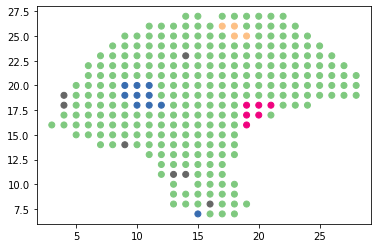

In [25]:
plt.scatter(df['imagecol'], df['imagerow'], c = df['cluster.init'], cmap="Accent_r")

In [29]:
local_data_man_scr_npy = np.load('C:/Home/Thesis/Git_Repo/Thesis/Algorithms/Unsupervised_Segmentation/Approaches/With_Scribble/Local_Data/Melanoma/Scribble/manual_scribble.npy')
local_data_man_scr_npy

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255,   1,   1, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255,   1,   1, 255, 255, 255, 255, 255,
        255, 255],
       [25

In [55]:
import pickle
fname = "C:/Home/Thesis/Git_Repo/Thesis/Algorithms/Unsupervised_Segmentation/Approaches/With_Scribble/Local_Data/Melanoma/Scribble/manual_scribble"
man_sc3 = np.load(f'{fname}.npy')
background = None
with open('C:/Home/Thesis/Git_Repo/Thesis/Algorithms/Unsupervised_Segmentation/Approaches/With_Scribble/Local_Data/Melanoma/Pickles/backgrounds.pickle','rb') as f:
    background = pickle.load(f)


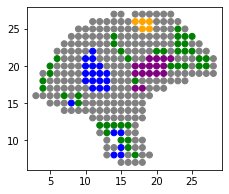

In [57]:
plt.figure(figsize=(3.5, 3))
xs = []
ys = []
color_names = ["green","blue","orange","purple"]
color = []
for i in range(len(man_sc3)):
    for j in range(len(man_sc3[0])):
        if man_sc3[i][j] < 255:
            xs.append(i)
            ys.append(j)
            color.append(color_names[man_sc3[i][j]-1])
            # print(man_sc3[i][j])
        elif (i,j) not in background:
            xs.append(i)
            ys.append(j)
            color.append("grey")
        # else:
        #     xs.append(i)
        #     ys.append(j)
        #     color.append("grey")         
        

plt.scatter(xs,ys,c=color)
plt.savefig(f'{fname}.pdf')

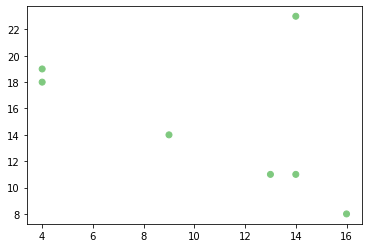

In [26]:
plt.scatter(df[df['cluster.init'] == 1]['imagecol'], df[df['cluster.init'] == 1]['imagerow'], c = df[df['cluster.init'] == 1]['cluster.init'], cmap="Accent")

In [ ]:
# manual_scribble_csv_path = '../' + dlpfc_sample + '/manual_scribble.csv'
# coordinates_csv_path = '../' + dlpfc_sample + '/Coordinates/coordinates.csv'

In [ ]:
# df_man = pd.read_csv(manual_scribble_csv_path)
# df_coord = pd.read_csv(coordinates_csv_path)

In [ ]:
# df_man['cluster.init'].value_counts()

4.0    40
3.0    39
2.0    33
1.0    32
0.0    11
Name: cluster.init, dtype: int64

In [ ]:
# df_man['cluster.init'] = df_man['cluster.init'].fillna(10)

In [ ]:
# df = df_coord.copy()

In [ ]:
# df['cluster.init'] = df_man['cluster.init']

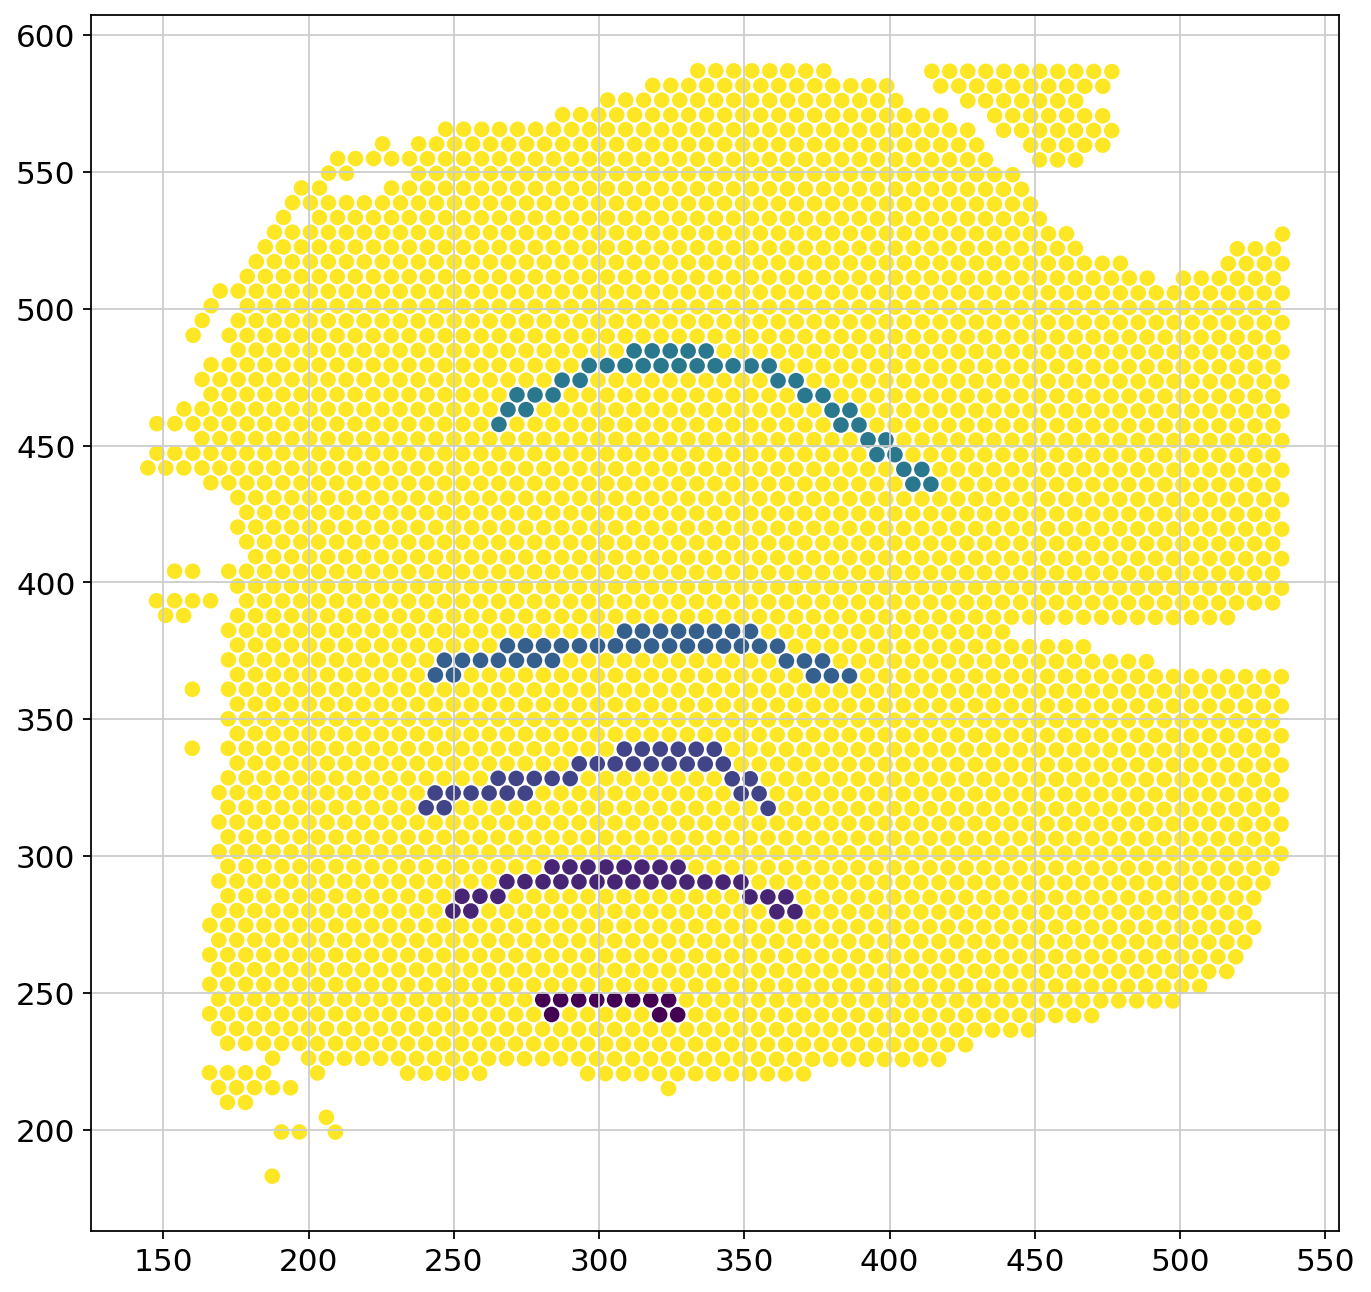

In [ ]:
# plt.scatter(df['imagecol'], 700 - df['imagerow'], c=df['cluster.init'])
# plt.savefig('../' + dlpfc_sample + '/Image_For_Scribbling/manual_scribble.png')

In [ ]:
adata = sc.read_h5ad('../151673/bayesSpace_after_all.h5ad')

In [ ]:
sc.set_figure_params(facecolor="white", figsize=(20, 20))
sc.settings.verbosity = 3

In [ ]:
adata

AnnData object with n_obs × n_vars = 3639 × 33538
    obs: 'barcode', 'sample_name', 'tissue', 'row', 'col', 'imagerow', 'imagecol', 'Cluster', 'height', 'width', 'sum_umi', 'sum_gene', 'subject', 'position', 'replicate', 'subject_position', 'discard', 'key', 'cell_count', 'SNN_k50_k4', 'SNN_k50_k5', 'SNN_k50_k6', 'SNN_k50_k7', 'SNN_k50_k8', 'SNN_k50_k9', 'SNN_k50_k10', 'SNN_k50_k11', 'SNN_k50_k12', 'SNN_k50_k13', 'SNN_k50_k14', 'SNN_k50_k15', 'SNN_k50_k16', 'SNN_k50_k17', 'SNN_k50_k18', 'SNN_k50_k19', 'SNN_k50_k20', 'SNN_k50_k21', 'SNN_k50_k22', 'SNN_k50_k23', 'SNN_k50_k24', 'SNN_k50_k25', 'SNN_k50_k26', 'SNN_k50_k27', 'SNN_k50_k28', 'GraphBased', 'Maynard', 'Martinowich', 'Layer', 'layer_guess', 'layer_guess_reordered', 'layer_guess_reordered_short', 'expr_chrM', 'expr_chrM_ratio', 'SpatialDE_PCA', 'SpatialDE_pool_PCA', 'HVG_PCA', 'pseudobulk_PCA', 'markers_PCA', 'SpatialDE_UMAP', 'SpatialDE_pool_UMAP', 'HVG_UMAP', 'pseudobulk_UMAP', 'markers_UMAP', 'SpatialDE_PCA_spatial', 'SpatialD

In [ ]:
len(adata)

3639

In [ ]:
adata.obs['index'] = range(len(adata))

In [ ]:
adata.obs.layer_guess

AAACAAGTATCTCCCA-1    Layer3
AAACAATCTACTAGCA-1    Layer1
AAACACCAATAACTGC-1        WM
AAACAGAGCGACTCCT-1    Layer3
AAACAGCTTTCAGAAG-1    Layer5
                       ...  
TTGTTTCACATCCAGG-1        WM
TTGTTTCATTAGTCTA-1        WM
TTGTTTCCATACAACT-1    Layer6
TTGTTTGTATTACACG-1        WM
TTGTTTGTGTAAATTC-1    Layer2
Name: layer_guess, Length: 3639, dtype: category
Categories (7, object): ['WM', 'Layer1', 'Layer2', 'Layer3', 'Layer4', 'Layer5', 'Layer6']

In [ ]:
adata_WM = adata[adata.obs.layer_guess == 'WM']
r_WM = adata_WM.obs.imagerow
c_WM = adata_WM.obs.imagecol

adata_1 = adata[adata.obs.layer_guess == 'Layer1']
r_1 = adata_WM.obs.imagerow
c_1 = adata_WM.obs.imagecol

adata_2_3 = adata[adata.obs.layer_guess == 'Layer2']
r_2_3 = adata_WM.obs.imagerow
c_2_3 = adata_WM.obs.imagecol

In [ ]:
row_merged = pd.concat([adata_2_3.obs.imagerow, adata_WM.obs.imagerow], axis=0)
col_merged = pd.concat([adata_2_3.obs.imagecol, adata_WM.obs.imagecol], axis=0)

In [ ]:
plt.scatter(row_merged, col_merged)

In [ ]:
plt.scatter(adata_2_3.obs.row, adata_2_3.obs.col) #pd.concat([s1, s2], axis=1)

In [ ]:
plt.scatter(r_WM, c_WM)

In [ ]:
r = adata.obs.imagerow
c = adata.obs.imagecol

In [ ]:
xy_arr = adata.obs[['imagerow','imagecol']]
xy = np.array(xy_arr)
xy

array([[381.09812294, 440.63907908],
       [126.32763711, 259.63097204],
       [427.76779151, 183.07831414],
       ...,
       [352.43025516, 208.41584876],
       [503.73539089, 250.72008064],
       [148.10981608, 284.29343913]])

In [ ]:
plt.scatter(r, c)

In [ ]:
def rotate(p, origin=(0, 0), degrees=0):
    '''
    function to rotate 2d coordinate system at 'origin' anticlockwise
    '''
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)

In [ ]:
#coordinates of spots
# xy_arr = df_pca_xy[['imagerow','imagecol']]
# xy = np.array(xy_arr)

#number of spots
len_adata = len(xy)

# all pair distance between coordinates
dist_mat = euclidean_distances(xy,xy) #dist_mat[i][j] = sqr(dist) between i and j cells

def find_nearest_six(x):
  '''
  find nearest 6 neighbours of a spot
  '''
  neighbors = dist_mat[x]
  ids = [i for i in range(len_adata)]
  zipped_lists = zip(neighbors, ids)
  sorted_pairs = sorted(zipped_lists)
  return [y for (_,y) in sorted_pairs[1:7]]

#find the center point of all spots
left_x = 1e10
left_y = 1e10
right_x = -1e9
right_y = -1e9
for i in xy:
    left_x = min(left_x, i[0] - 50)
    left_y = min(left_y, i[1] - 50)
    right_x = max(right_x, i[0] + 50)
    right_y = max(right_y, i[1] + 50)
    
left_border_x = left_x + 50
left_border_y = left_y + 50
right_border_x = right_x - 50
right_border_y = right_y - 50

#rotate the spots' coordinate system
xy = rotate(xy, ((left_border_x  + right_border_x) / 2, (left_border_y + right_border_y) / 2), -90)

In [ ]:
adata.obs.Maynard.dtypes

CategoricalDtype(categories=['1', '2_3', '4', '4_5', '5', '5_6', '6', '1_6', 'WM'], ordered=False)

In [ ]:
L1 = adata.obs.Maynard[adata.obs.Maynard == '1']
L2_3 = adata.obs.Maynard[adata.obs.Maynard == '2_3']
L4 = adata.obs.Maynard[adata.obs.Maynard == '4']
L4_5 = adata.obs.Maynard[adata.obs.Maynard == '4_5']
L5 = adata.obs.Maynard[adata.obs.Maynard == '5']
L5_6 = adata.obs.Maynard[adata.obs.Maynard == '5_6']
L6 = adata.obs.Maynard[adata.obs.Maynard == '6']
L1_6 = adata.obs.Maynard[adata.obs.Maynard == '1_6']
L_WM = adata.obs.Maynard[adata.obs.Maynard == 'WM']

In [ ]:
len(L2_3.index)

753

In [ ]:
xy_2_3 = adata.obs[adata.obs.barcode in L2_3.index]
xy_2_3

TypeError: ignored

In [ ]:
plt.scatter(xy[:, 0], xy[:, 1])

In [ ]:
adata_WM = adata[adata.obs.barcode.tolist() in L_WM.index.tolist(), :]

In [ ]:
r_WM, c_WM = adata_WM.obs[['imagerow', 'imagecol']]

NameError: name 'adata_WM' is not defined

In [ ]:
adata_WM.obs.imagerow

AAACAAGTATCTCCCA-1    381.098123
Name: imagerow, dtype: float64

In [ ]:
plt.scatter(r_WM, c_WM)

In [ ]:
def manual_scribble(adata, layer):
  xy_arr = adata.obs[['imagerow','imagecol']]
  xy = np.array(xy_arr)
  len_adata = len(xy)

  # all pair distance between coordinates
  dist_mat = euclidean_distances(xy,xy) #dist_mat[i][j] = sqr(dist) between i and j cells

  def find_nearest_six(x):
    '''
    find nearest 6 neighbours of a spot
    '''
    neighbors = dist_mat[x]
    ids = [i for i in range(len_adata)]
    zipped_lists = zip(neighbors, ids)
    sorted_pairs = sorted(zipped_lists)
    return [y for (_,y) in sorted_pairs[1:7]]

  #find the center point of all spots
  left_x = 1e10
  left_y = 1e10
  right_x = -1e9
  right_y = -1e9
  for i in xy:
      left_x = min(left_x, i[0] - 50)
      left_y = min(left_y, i[1] - 50)
      right_x = max(right_x, i[0] + 50)
      right_y = max(right_y, i[1] + 50)
      
  left_border_x = left_x + 50
  left_border_y = left_y + 50
  right_border_x = right_x - 50
  right_border_y = right_y - 50

  #rotate the spots' coordinate system
  xy = rotate(xy, ((left_border_x  + right_border_x) / 2, (left_border_y + right_border_y) / 2), -90)
  idx = adata.obs['index']
  for i in range(len(xy)):
    plt.scatter(xy[i][0], xy[i][1])
    plt.text(xy[i][0], xy[i][1], idx[i])
  plt.savefig('151673/layer' + str(layer) + '.png')

In [ ]:
manual_scribble(adata[adata.obs.layer_guess == 'Layer6'], 6)

In [ ]:
!pwd

/content/drive/My Drive/Thesis/Organized/Data/Human_DLPFC


In [ ]:
layer_WM_annotation = {2058, 3070, 2905, 2926, 2629, 2533, 2382, 2372, 505, 1889, 3582, 1998, 717, 1723, 1484, 2720, 1275, 1318, 2941, 557, 216, 1713, 1435,
                       652, 918, 3547, 53, 2742, 472, 2201, 2323, 2239, 916, 2707, 1009, 1035, 3522, 2630, 3072, 3118, 2102, 2985, 3072, 879, 1902, 3451, 1250,
                       318, 596, 345, 603, 2033, 58, 987, 135, 1632, 1819, 2311, 2798, 2718, 1668, 333, 1230, 403, 635, 3196, 2509, 2292, 2471, 1729, 2977, 180, 2706, 2514, 1680}

In [ ]:
layer_1_annotation = {1159, 2179, 1488, 1156, 3512, 3431, 1204, 891, 685, 725, 3401, 1560, 1951, 2449, 346, 404, 1443, 2065, 63,
                      543, 2435, 2910, 3433, 3216, 2730, 1633, 1502, 1617, 1019, 486, 2156, 302, 1996, 2352, 49, 2758, 713, 849, 
                      2525, 1326, 929, 2524, 1472, 1017, 3434, 2301, 627, 736, 1139, 2459, 2168, 1963, 620, 911, 3501, 3238, 969}

In [ ]:
layer_2_annotation = {208, 960, 2405, 1807, 2534, 1698, 2702, 2002, 2942, 1436, 407, 3337, 3073, 118, 3638, 952, 964, 2930, 711, 1722, 1061, 3589, 2633, 2580, 2712, 559, 234, 86, 1244, 3362, 3381, 2141, 541, 22, 932, 1411, 2539, 3267, 3320, 1702, 2290, 474, 303,
                      1564, 2092, 3061, 1984, 3042, 3111, 1862, 1319, 1279, 184, 1756, 2180, 3455, 793, 3356, 1459, 2908, 1960, 1528, 589, 3235, 37, 2594,
                      875, 2432, 2112, 1385, 965, 2584, 2160, 2300, 3515, 1426, 1439, 3570, 1479, 2624, 2083, 803, 1736, 2866, 1693, 2009, 3005, 1183, 452,
                      3123, 984, 3339, 3157, 1546, 80, 2339, 983}

In [ ]:
layer_3_annotation = {2751, 3590, 1247, 584, 1473, 3405, 3429, 179, 1194, 2219, 1427, 3598, 1271, 2987, 2828, 466, 2857, 675, 1079, 1631, 834, 2238,
                      2530, 3447, 2069, 1789, 1243, 1921, 2728, 2062, 1498, 2318, 214, 1834, 706, 760, 3540, 2875, 937, 1557, 2499, 1351, 2235, 2628,
                      3091, 1336, 3244, 2451, 564, 2733, 2120, 1255, 2456, 1089, 77, 2021, 2011, 3176, 2693, 1213, 1883, 1068, 1122, 3306, 1173, 1510,
                      912, 192, 1867, 629, 2820, 1289, 2871, 1613, 1848, 1689, 320, 931, 46, 1569, 1854, 2027, 1138, 688, 85, 3288, 2005, 2990, 1340,
                      3621, 602, 759, 994, 1798, 2767, 232, 1116, 1034, 3194, 925, 1398, 1241, 2423, 2283, 1062, 865, 1523, 3355, 2615, 3127, 2098,
                      380, 2481, 355, 2824, 2185, 2063, 273, 2559, 1002, 1517, 3058, 3110, 1751, 798, 1355, 61, 1004, 1053, 2542, 2066, 285, 3397, 1115,
                      347, 103, 1461, 896, 2134, 962, 82, 898, 590, 3010, 3599, 1747, 1957, 418, 1532, 661, 1953, 585, 231, 2241, 2970, 1276, 3494, 2088,
                      3, 3592, 497, 2330, 2973, 1064, 1291, 1556, 2230, 3215, 2689, 628, 3233, 673, 2711, 2891, 2308, 525, 1866, 566, 1124, 1112, 212,
                      2355, 1078, 2218, 883, 3516, 1080, 94, 494, 548, 3498, 2589, 1232, 3448, 870, 2805, 1716, 1705, 1655, 2865, 3526, 2890, 3304, 3550,
                      1084, 210, 2129, 871, 1667, 2495, 608, 188, 701, 1630, 366, 1352, 350, 3539, 806, 660, 2428, 1950, 1208, 2588, 2974, 1735, 2484,
                      2641, 3015, 2850, 1803, 411, 448, 2722, 1651, 2674, 2181, 2210, 2789, 498, 2951, 909, 995, 1189, 3202, 353, 1659, 39, 702, 1855,
                      749, 2176, 2182, 743, 2818, 1959, 399, 2107, 2468, 554, 287, 1128, 3180, 3426, 2918, 298, 2228, 2551, 2754, 1015, 1529, 2421,
                      656, 166, 328, 992, 1132, 792, 3186, 2473, 3567, 2087, 2953, 1535, 762, 690, 833, 487, 3542, 2121, 3099, 0, 397, 1256, 866, 485,
                      2329, 3602, 1986, 3048, 1460, 1008, 1252, 3039, 43, 1211, 2434, 191, 2172, 906, 1672, 638, 1140, 972, 3272, 1217, 1942, 358, 1424,
                      981, 3084, 1634, 2296, 3102, 797, 881, 1625, 1476, 2131, 2825, 272, 1039, 3237, 1842, 1316, 2166, 311, 2277, 3150, 2956, 7, 3166,
                      1744, 935, 3452, 1358, 733, 2814, 2752, 3628, 235, 1297, 1480}

In [ ]:
layer_4_annotation = {1738, 2949, 3057, 2849, 1285, 130, 582, 1858, 2725, 3611, 3120, 1219, 1178, 872, 2894, 3212, 3607, 1141, 530, 3541, 384, 2212,
                      1429, 3421, 2610, 360, 1187, 2565, 2511, 1762, 2332, 3026, 754, 1324, 2133, 2135, 223, 535, 2750, 155, 731, 728, 1644, 1624,
                      2359, 1525, 2275, 3162, 2215, 1094, 3209, 3450, 2266, 953, 2165, 2313, 1412, 1767, 3295, 1413, 721, 1182, 1987, 98, 1656, 3293, 1983,
                      2554, 1793, 624, 770, 2345, 2760, 405, 441, 2605, 2017, 903}

In [ ]:
layer_5_annotation = {2387, 2427, 12, 1199, 189, 73, 1553, 2806, 3453, 3427, 1016, 161, 3036, 2672, 510, 1168, 913, 922, 2982, 2637, 3315, 1380, 1596,
                      57, 1453, 1955, 824, 2040, 813, 1054, 730, 1504, 2697, 2945, 257, 3422, 2394, 1954, 3354, 855, 1795, 3622, 3465, 3579, 724, 278,
                      1171, 3144, 2745, 3189, 862, 116, 768, 1567, 3307, 1131, 3284, 739, 3595, 1367, 3379, 613, 3021, 1487, 3034, 3021, 1801, 351, 718,
                      1063, 863, 519, 3562, 1467, 3396, 622, 157, 1087, 1550, 2297, 1622, 3619, 2748, 1437, 251, 1195, 1991, 1179, 2922, 3225, 2322, 1511,
                      2440, 1543, 2832, 664, 3365, 1225, 3259, 659, 2388, 1310, 1373, 2808, 1770, 3477, 2612, 1455, 919, 2853, 1364, 1838, 2267, 1925,
                      1547, 563, 237, 228, 3391, 848, 492, 3052, 421, 3040, 2080, 319, 2512, 2652, 3075, 236, 440, 3165, 169, 3275, 40, 509, 2237, 3151,
                      2893, 1341, 295, 999, 1605, 372, 2644, 434, 1965, 1808, 835, 1691, 370, 707, 1060, 3420, 2816, 1684, 2592, 2369, 3087, 2595, 1940}

In [ ]:
layer_6_annotation = {2010, 570, 1403, 410, 2810, 2086, 342, 606, 21, 62, 3096, 3208, 928, 2819, 1824, 778, 2089, 9, 1507, 2642, 364, 1399, 3580, 2863,
                      3170, 490, 2367, 387, 2214, 1972, 2111, 108, 354, 2314, 3253, 2183, 1176, 1104, 2376, 2678, 2041, 501, 3071, 2059, 2917, 1811,
                      1526, 755, 1386, 967, 2110, 2486, 1196, 2548, 1663, 2835, 1516, 2507, 3004, 950, 614, 386, 2190, 1907, 1086, 1328, 1792, 683, 2295,
                      2226, 2782, 2492, 1536, 19, 3499, 2526, 705, 2770, 2694, 2659, 3138, 227, 467, 1240, 1214, 3041, 1828, 289, 222, 2703, 1676, 3441,
                      1521, 1372, 2144, 568, 1515, 2213, 2261, 107, 2692, 3629, 1449, 1363, 3296, 2383, 2774, 1206, 2764, 3430, 2854, 1826, 3511, 1887,
                      2240, 982, 1410, 1671, 609, 517, 1433, 3386, 1602, 1892, 3204, 2325}

In [ ]:
scribble_labels = [255] * len(adata)

In [ ]:
for i in layer_WM_annotation:
    scribble_labels[i] = 7

for i in layer_1_annotation:
    scribble_labels[i] = 1

for i in layer_2_annotation:
    scribble_labels[i] = 2

for i in layer_3_annotation:
    scribble_labels[i] = 3

for i in layer_4_annotation:
    scribble_labels[i] = 4

for i in layer_5_annotation:
    scribble_labels[i] = 5

for i in layer_6_annotation:
    scribble_labels[i] = 6


In [ ]:
manual_scribble_df = pd.DataFrame(data=scribble_labels, index=adata.obs.index, columns=['cluster.init'])

In [ ]:
manual_scribble_df.to_csv( 'manual_scribble_labels.csv', index=True, header=True)

In [ ]:
len(layer_WM_annotation)

74

In [ ]:
layer_WM_annotation = [2058, 3070]

In [ ]:
xy_arr = adata.obs[['imagerow','imagecol']].to_numpy()
x_cor = xy_arr[:,0]
y_cor = xy_arr[:,1]

In [ ]:
for i in range(len(scribble_labels)):
    if scribble_labels[i] == 255:
        scribble_labels[i] = 0

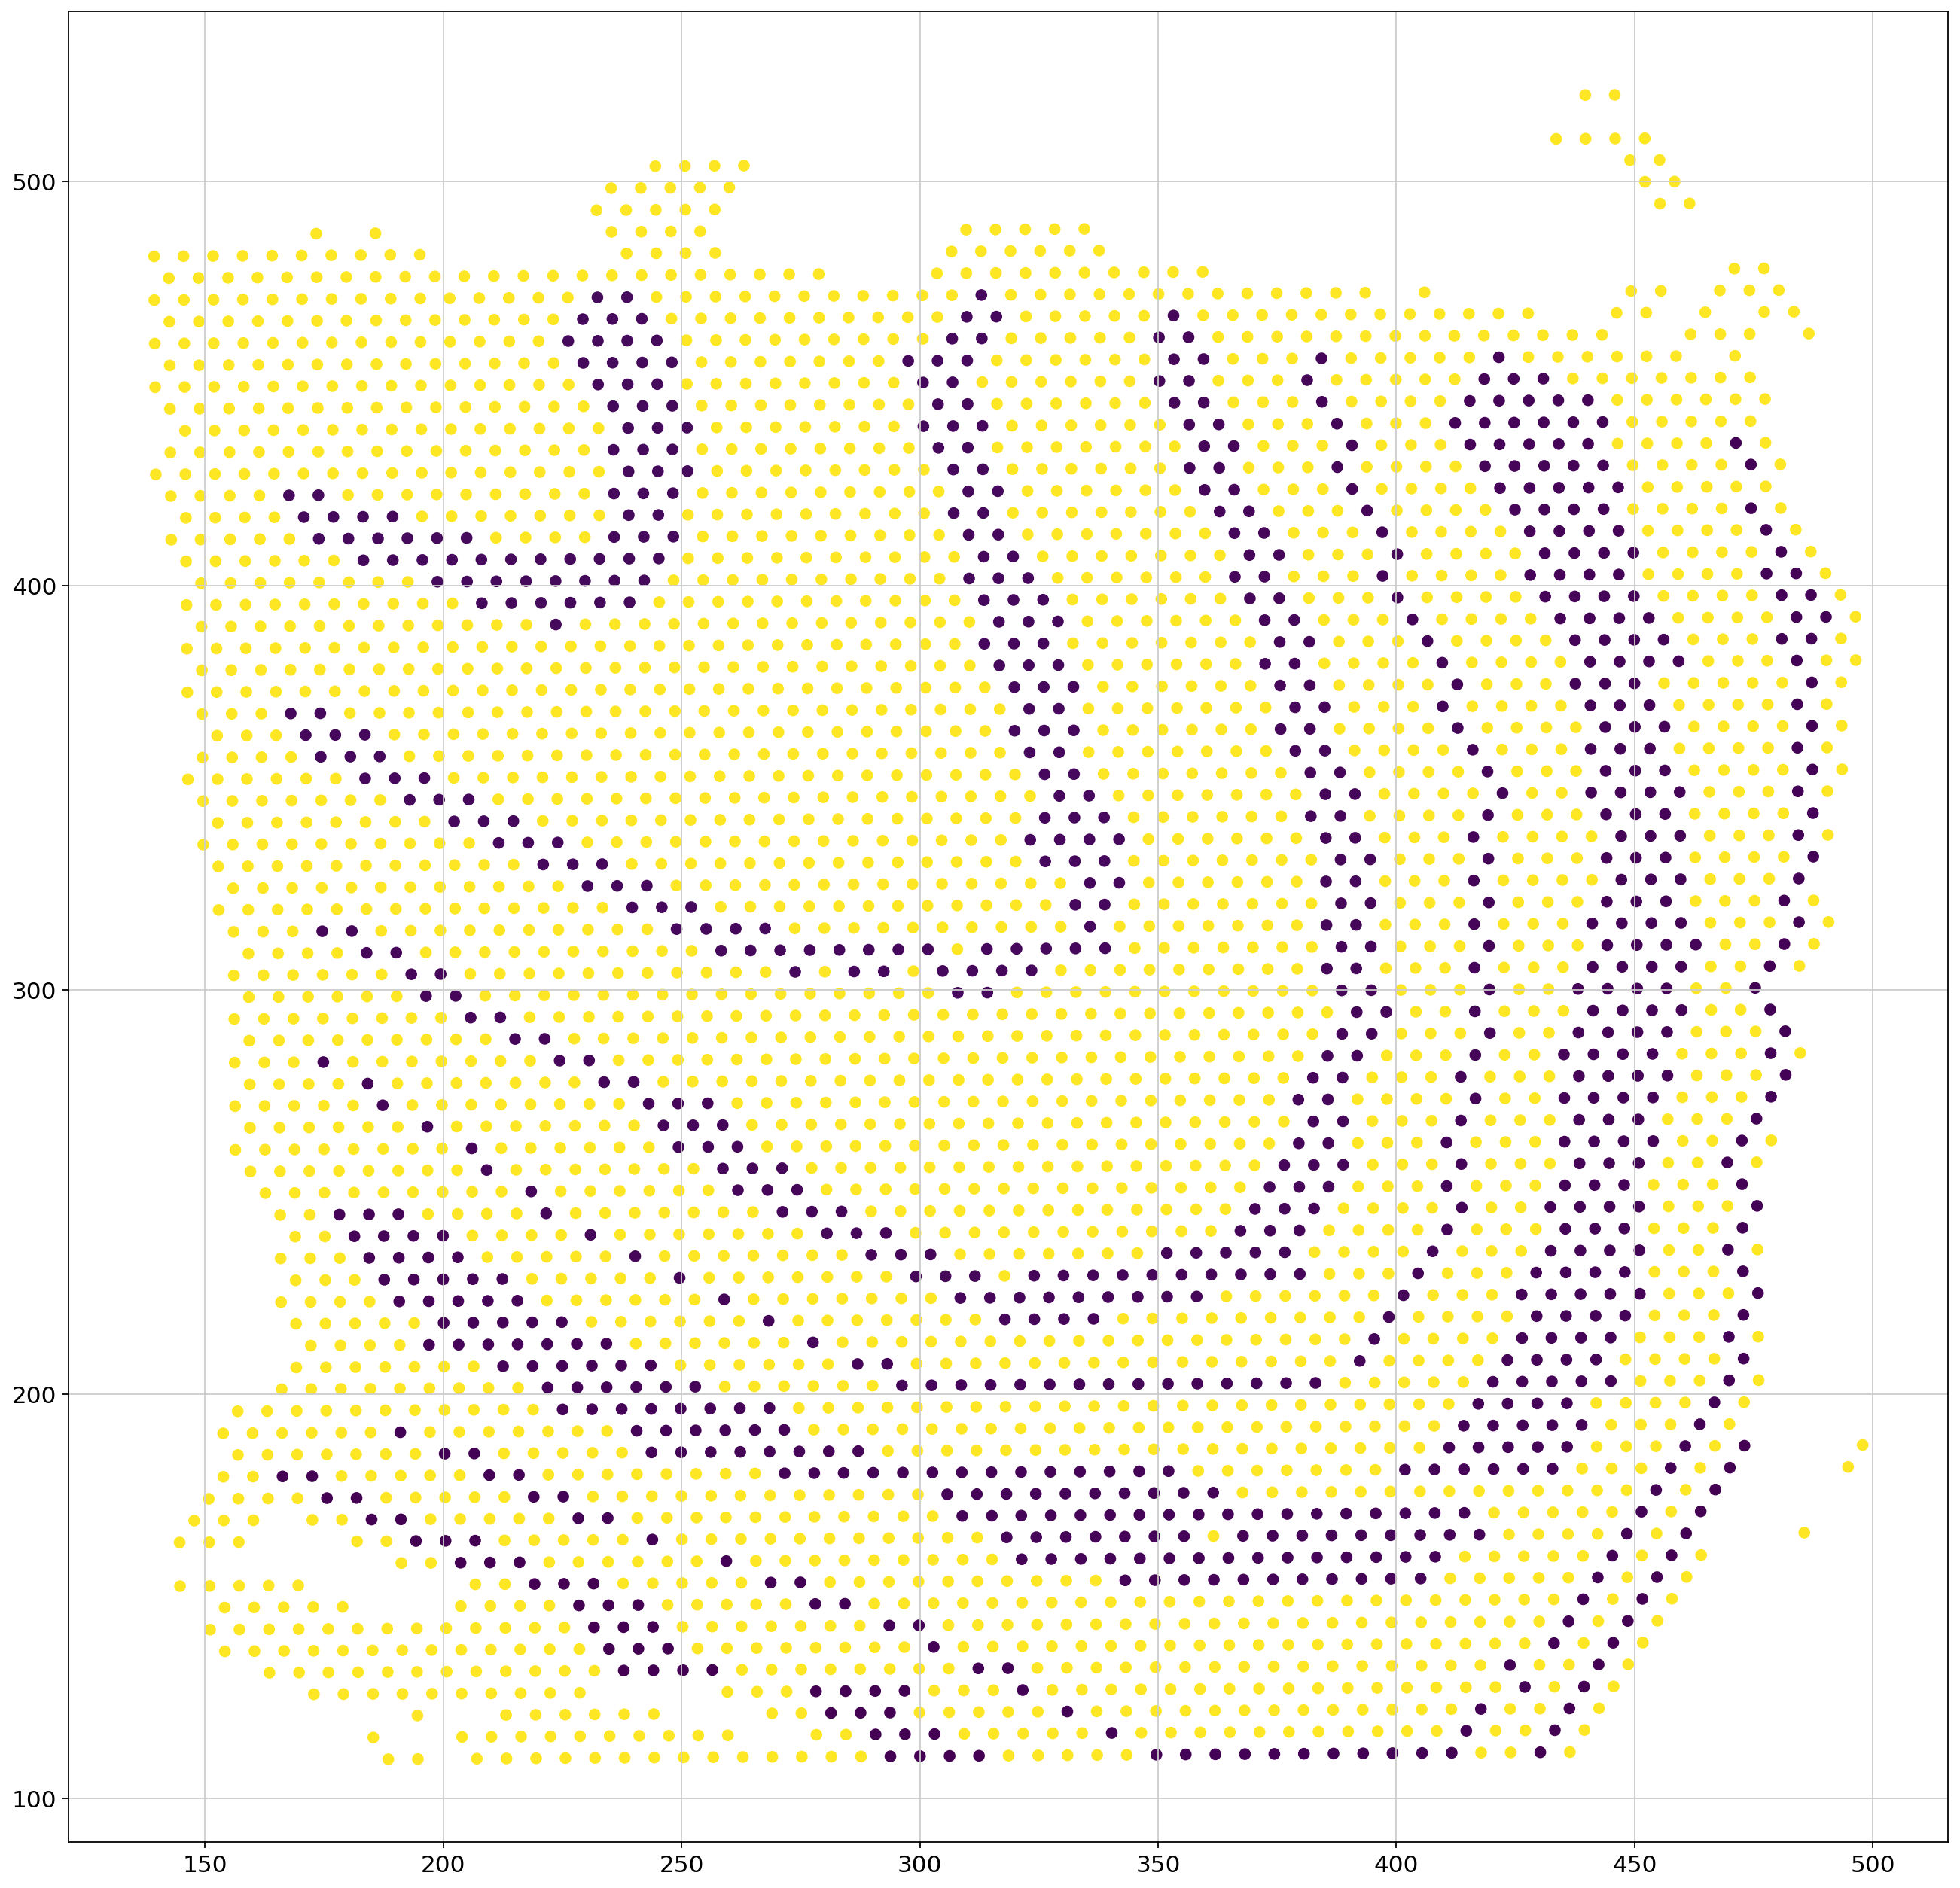

In [ ]:
plt.scatter(y_cor, x_cor, c=scribble_labels)